# Data Visualization with Seaborn

**1. Examples**

The purpose of this section is to give you some examples of data visualizations with the Seaborn package in Python. We will use a public dataset called "diamonds". Each row in this dataset represents one diamond and we have columns about the price, the carat, clarity and more.

**2. Exercise**

The purpose of this section is to allow you to practice and apply the knowledge you gained from the examples. We will use a public dataset called "mpg". Each row represents one car and we have columns about mpg (miles per gallon), cylinders, origin and more.

References: 
- Seaborn: http://seaborn.pydata.org/api.html
- Matplotlib: https://matplotlib.org/stable/api/index

In [1]:
#!conda install -y pandas seaborn matplotlib

In [2]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Settings
%matplotlib inline
sns.set(style = "whitegrid", font_scale = 1.5)
plt.rcParams["figure.figsize"] = [10,7.5]

# 1. Examples

In [4]:
# We are using a public dataset about diamonds
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 1.1 Distribution

### What is the distribution of the price of the diamonds?

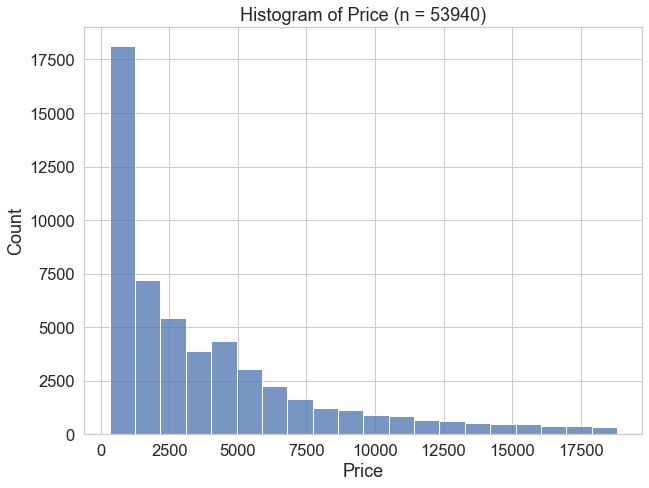

In [5]:
# Histogram
p = sns.histplot(df["price"], bins = 20)
plt.title("Histogram of Price (n = {})".format(len(df)))
plt.ylabel("Count")
plt.xlabel("Price")
plt.show(p)

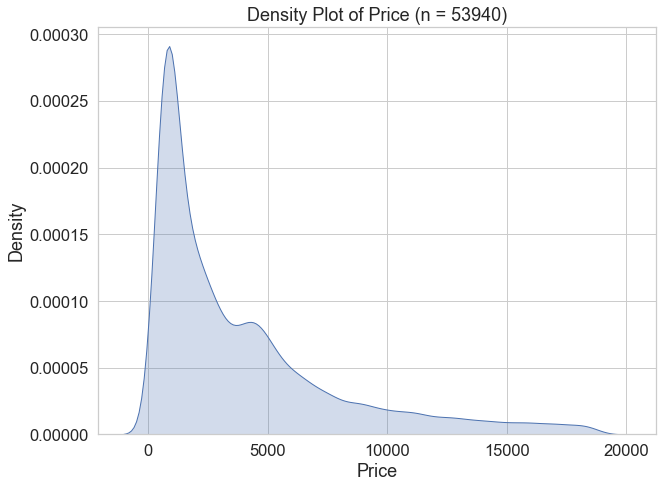

In [6]:
# Density plot
p = sns.kdeplot(df["price"], shade=True)
plt.title("Density Plot of Price (n = {})".format(len(df)))
plt.ylabel("Density")
plt.xlabel("Price")
plt.show(p)

### What is the distribution of the price of the diamonds that are "fair" and "ideal"?

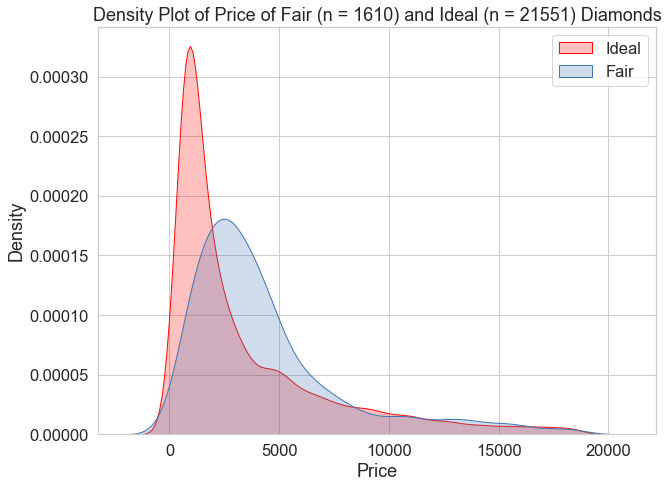

In [7]:
# Density plot with two groups
sns.kdeplot(df.loc[df.cut == 'Ideal'].price, color="#FF0B04", shade = True, label="Ideal");
sns.kdeplot(df.loc[df.cut == 'Fair'].price, color="#4374B3", shade = True, label="Fair");

n_fair = len(df.loc[df.cut == 'Fair'])
n_ideal = len(df.loc[df.cut == 'Ideal'])
plt.title("Density Plot of Price of Fair (n = {}) and Ideal (n = {}) Diamonds".format(n_fair, n_ideal))
plt.ylabel("Density")
plt.xlabel("Price")
plt.legend();

### What is the distribution of diamonds by cut?

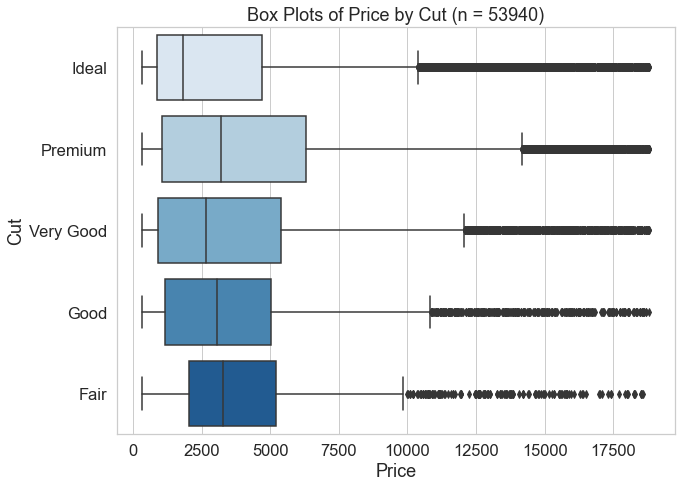

In [8]:
p = sns.boxplot(x="price", y="cut", data=df, palette="Blues")
plt.title("Box Plots of Price by Cut (n = {})".format(len(df)))
plt.ylabel("Cut")
plt.xlabel("Price")
plt.show(p)


### What is the joint distribution of price and carat?

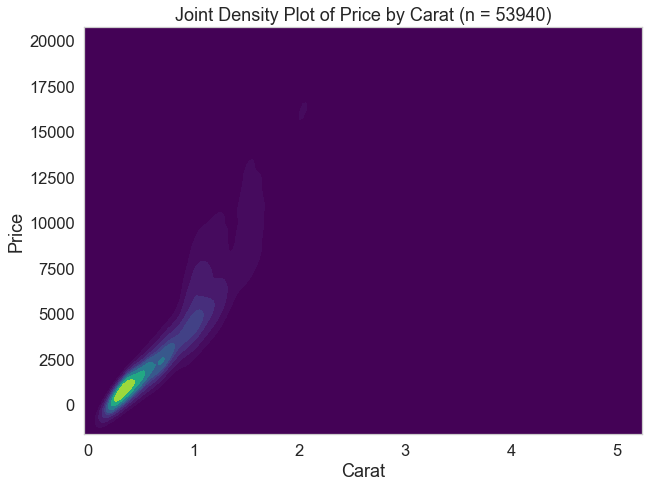

In [9]:
# Joint density plot
p = sns.kdeplot(x="carat", y="price", cmap="viridis", data = df,
                shade=True, thresh=False, legend=True)
plt.title("Joint Density Plot of Price by Carat (n = {})".format(len(df)))
plt.ylabel("Price")
plt.xlabel("Carat")
plt.show(p)

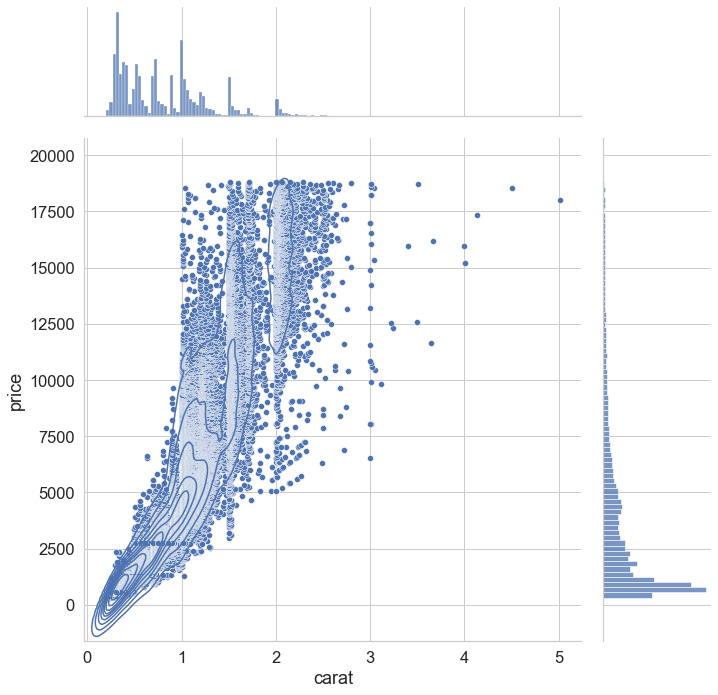

In [10]:
# Alternative to joint density plot
p = sns.jointplot(x="carat", y="price", data=df, height=10, ratio=4, color="b")\
       .plot_joint(sns.kdeplot, color="b")
plt.show(p)

## 1.2 Comparison

### What is the average price by color?

In [11]:
# Prepare data
df_plt = df.groupby("color")["price"].mean().reset_index().sort_values("price", ascending=False)
df_plt

,color,price
6,J,5323.818020
5,I,5091.874954
4,H,4486.669196
3,G,3999.135671
2,F,3724.886397
0,D,3169.954096
1,E,3076.752475


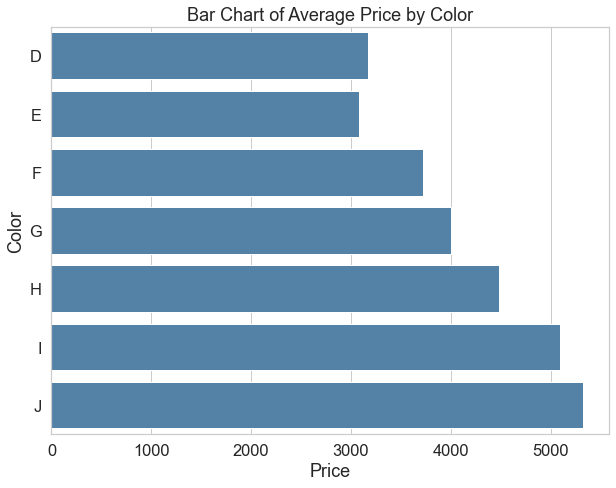

In [12]:
# Bar chart
p = sns.barplot(y="color", 
                x="price", 
                color="steelblue",
                data=df_plt)
plt.title("Bar Chart of Average Price by Color")
plt.ylabel("Color")
plt.xlabel("Price")
plt.show(p)

### What is the number of diamonds by cut and color?

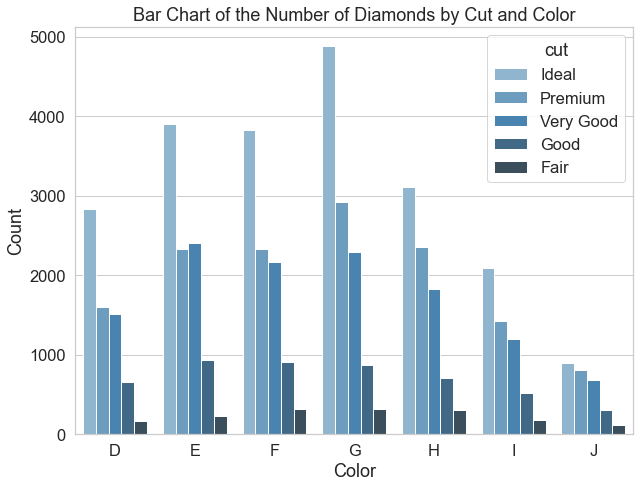

In [13]:
# Count plot with groups
p = sns.countplot(x="color", 
            hue="cut", 
            palette="Blues_d",
            data=df)
plt.ylabel("Count")
plt.xlabel("Color")
plt.title("Bar Chart of the Number of Diamonds by Cut and Color")
plt.show(p)

## 1.3 Composition

### What is the proportion of diamonds per color?

In [14]:
# Prepare data
df_plt = df.groupby(["color"]).size().reset_index().rename(columns={0:"count"})
df_plt

,color,count
0,D,6775
1,E,9797
2,F,9542
3,G,11292
4,H,8304
5,I,5422
6,J,2808


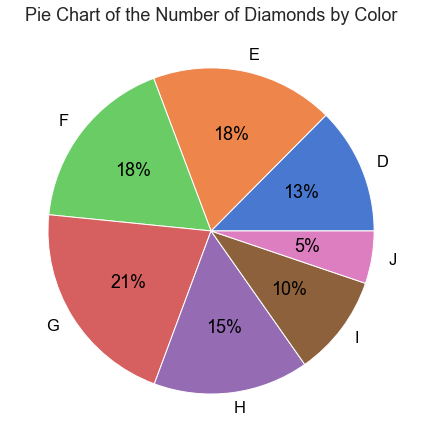

In [15]:
# Pie chart
colors = sns.color_palette('muted')[0:7]
p = plt.pie(x = "count", labels = "color", data = df_plt, 
            autopct='%.0f%%', textprops={'color':"black"}, colors = colors)
plt.title("Pie Chart of the Number of Diamonds by Color")
plt.show(p)

## 1.4 Relationship

### What is the relationship between carat and price? 

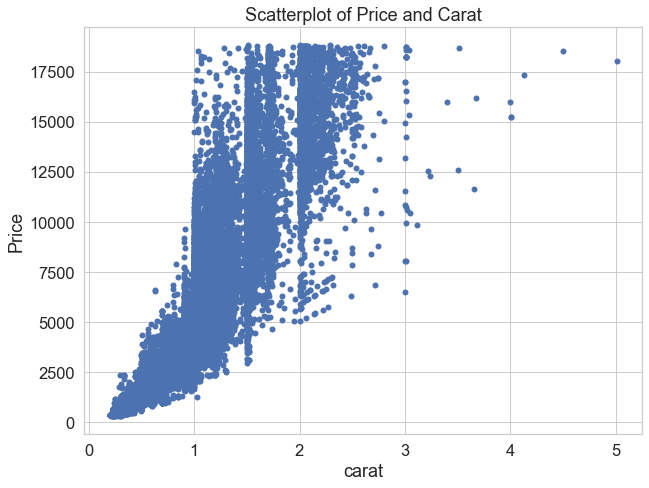

In [16]:
# Scatterplot
p = sns.scatterplot(x="carat", y="price", data=df, linewidth=0)
plt.ylabel("Price")
plt.xlabel("carat")
plt.title("Scatterplot of Price and Carat")
plt.show(p)

### What is the relationship between carat, price and cut?

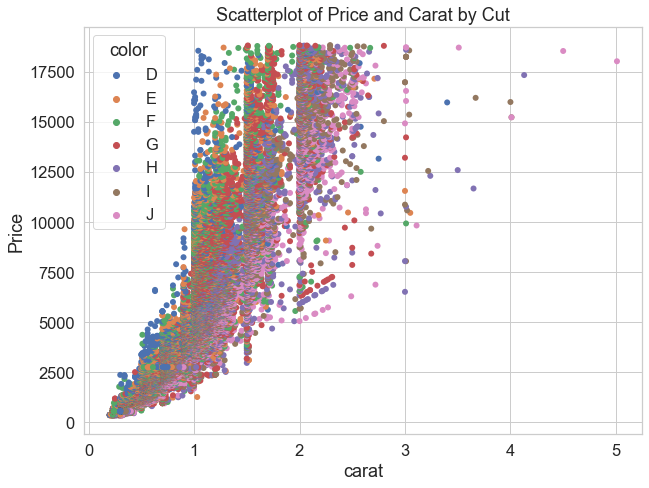

In [17]:
# Scatterplot colored by group
p = sns.scatterplot(x="carat", y="price", hue="color", data=df, linewidth=0)
plt.ylabel("Price")
plt.xlabel("carat")
plt.title("Scatterplot of Price and Carat by Cut")
plt.show(p)

### What is the correlation between the numeric variables?


In [18]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('black'), c('white'), 0.5, c('white'), c('darkorange')])

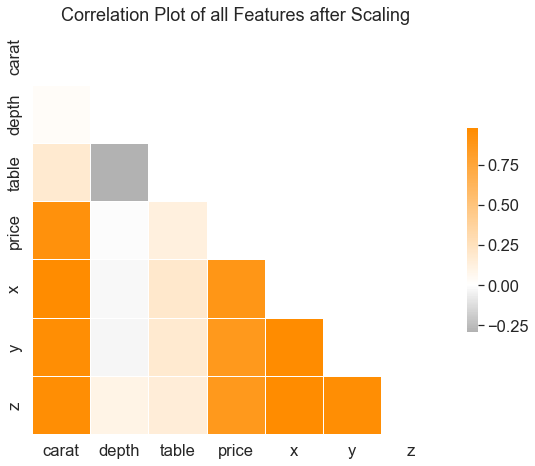

In [19]:
# Correlation plot

# Get correlation for numberic variables
df_plt = sns.load_dataset("diamonds").drop(columns = ["cut", "color", "clarity"])
corr = df_plt.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
p = sns.heatmap(corr, mask=mask, cmap = rvb, center=0, #vmax=.3, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
p.set(title = "Correlation Plot of all Features after Scaling");

# 2. Exercise

In [24]:
# We are using a public dataset about cars
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### What is the distribution of mpg?

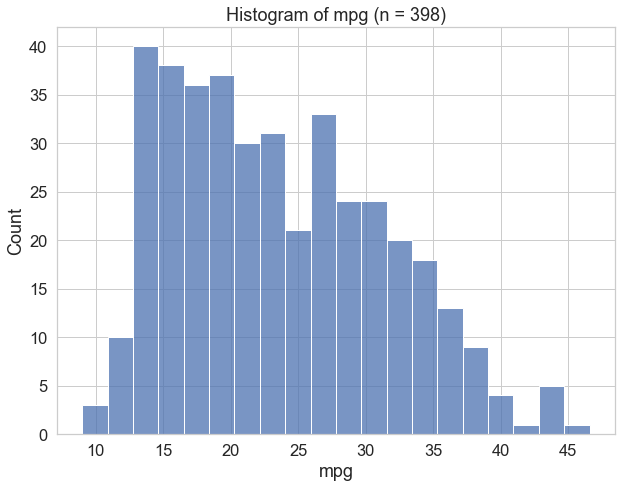

In [26]:
# Histogram
p = sns.histplot(df["mpg"], bins = 20)
plt.title("Histogram of mpg (n = {})".format(len(df)))
plt.ylabel("Count")
plt.xlabel("mpg")
plt.show(p)

### What is the distribution of mpg by origin?

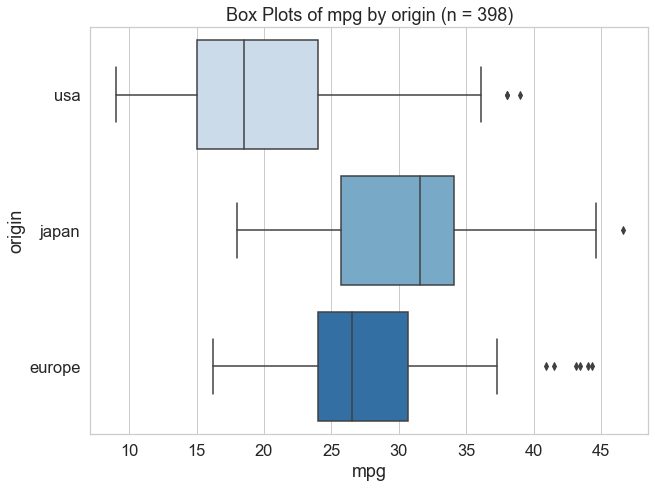

In [28]:
p = sns.boxplot(x="mpg", y="origin", data=df, palette="Blues")
plt.title("Box Plots of mpg by origin (n = {})".format(len(df)))
plt.ylabel("origin")
plt.xlabel("mpg")
plt.show(p)


### What is the proportion of cars by cylinders? 

In [40]:
# Prepare data
df_plt = df.groupby(["cylinders"]).size().reset_index().rename(columns={0:"count"})
df_plt

,cylinders,count
0,3,4
1,4,204
2,5,3
3,6,84
4,8,103


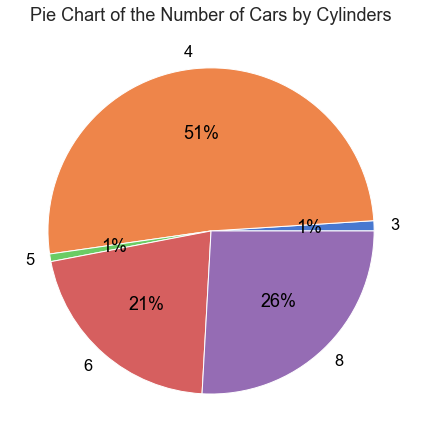

In [41]:
# Pie chart
colors = sns.color_palette('muted')[0:7]
p = plt.pie(x = "count", labels = "cylinders", data = df_plt, 
            autopct='%.0f%%', textprops={'color':"black"}, colors = colors)
plt.title("Pie Chart of the Number of Cars by Cylinders")
plt.show(p)

### What is the relation between acceleration and mpg?

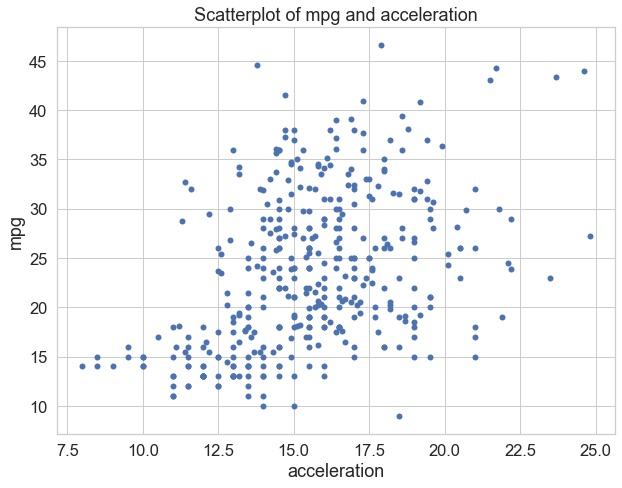

In [42]:
# Scatterplot
p = sns.scatterplot(x="acceleration", y="mpg", data=df, linewidth=0)
plt.ylabel("mpg")
plt.xlabel("acceleration")
plt.title("Scatterplot of mpg and acceleration")
plt.show(p)

### What is the average mpg by cylinders?

In [43]:
# Prepare data
df_plt = df.groupby("cylinders")["mpg"].mean().reset_index().sort_values("mpg", ascending=False)
df_plt

,cylinders,mpg
1,4,29.286765
2,5,27.366667
0,3,20.550000
3,6,19.985714
4,8,14.963107


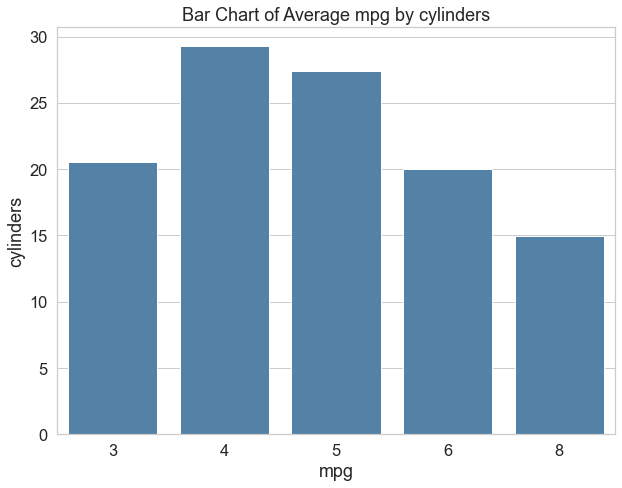

In [47]:
# Bar chart
p = sns.barplot(x="cylinders", 
                y="mpg", 
                color="steelblue",
                data=df_plt)
plt.title("Bar Chart of Average mpg by cylinders")
plt.ylabel("cylinders")
plt.xlabel("mpg")
plt.show(p)